# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman

...

### import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### set defaults

In [2]:
sns.set_context('poster')
sns.set_style('ticks')

### load data

In [3]:
dataset = '../data/feelingOld.csv'

In [4]:
dataset

'../data/feelingOld.csv'

In [5]:
df = pd.read_csv (dataset)

In [6]:
df

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
0,"Yes, I am at least 18 years of age, have read ...",4,55,80,21,female,0
1,"Yes, I am at least 18 years of age, have read ...",5,40,50,39,female,5
2,"Yes, I am at least 18 years of age, have read ...",5,40,70,21,female,0
3,"Yes, I am at least 18 years of age, have read ...",2,40,60,36,female,1
4,"Yes, I am at least 18 years of age, have read ...",5,50,112,46,male,0
5,"Yes, I am at least 18 years of age, have read ...",5,40,60,47,Male,2
6,"Yes, I am at least 18 years of age, have read ...",5,30,90,29,female,0
7,"Yes, I am at least 18 years of age, have read ...",1,40,50,35,female,0
8,"Yes, I am at least 18 years of age, have read ...",5,30,50,33,male,0
9,"Yes, I am at least 18 years of age, have read ...",3,50,75,41,male,2


### clean up

In [7]:
clean_df = df.drop('Consent',axis=1)
clean_df.loc[:,'gender'] = [['male', 'female']['fem' in x.lower()] for x in clean_df.loc[:, 'gender']]

In [8]:
clean_df

,ageFeel,oldBegin,oldReally,age,gender,numChild
0,4,55,80,21,female,0
1,5,40,50,39,female,5
2,5,40,70,21,female,0
3,2,40,60,36,female,1
4,5,50,112,46,male,0
5,5,40,60,47,male,2
6,5,30,90,29,female,0
7,1,40,50,35,female,0
8,5,30,50,33,male,0
9,3,50,75,41,male,2


### transform

In [9]:
list(range(0,100,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [10]:
clean_df.loc[:,'ageBin'] = pd.cut(clean_df.loc[:,'age'],bins=range(0,100,10))

In [11]:
clean_df.loc[:,'oldBeginBin'] = pd.cut(clean_df.loc[:,'oldBegin'],bins=range(0,100,10))

In [12]:
clean_df

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin
0,4,55,80,21,female,0,"(20, 30]","(50, 60]"
1,5,40,50,39,female,5,"(30, 40]","(30, 40]"
2,5,40,70,21,female,0,"(20, 30]","(30, 40]"
3,2,40,60,36,female,1,"(30, 40]","(30, 40]"
4,5,50,112,46,male,0,"(40, 50]","(40, 50]"
5,5,40,60,47,male,2,"(40, 50]","(30, 40]"
6,5,30,90,29,female,0,"(20, 30]","(20, 30]"
7,1,40,50,35,female,0,"(30, 40]","(30, 40]"
8,5,30,50,33,male,0,"(30, 40]","(20, 30]"
9,3,50,75,41,male,2,"(40, 50]","(40, 50]"


In [13]:
count_df = clean_df.groupby('ageBin').count()
count_df.loc[:,'ageBin'] = count_df.index
count_df

,ageFeel,oldBegin,oldReally,age,gender,numChild,oldBeginBin,ageBin
ageBin,,,,,,,,
"(0, 10]",0,0,0,0,0,0,0,"(0, 10]"
"(10, 20]",2,2,2,2,2,2,2,"(10, 20]"
"(20, 30]",72,72,72,72,72,72,72,"(20, 30]"
"(30, 40]",61,61,61,61,61,61,61,"(30, 40]"
"(40, 50]",29,29,29,29,29,29,29,"(40, 50]"
"(50, 60]",22,22,22,22,22,22,22,"(50, 60]"
"(60, 70]",6,6,6,6,6,6,6,"(60, 70]"
"(70, 80]",3,3,3,3,3,3,3,"(70, 80]"
"(80, 90]",0,0,0,0,0,0,0,"(80, 90]"


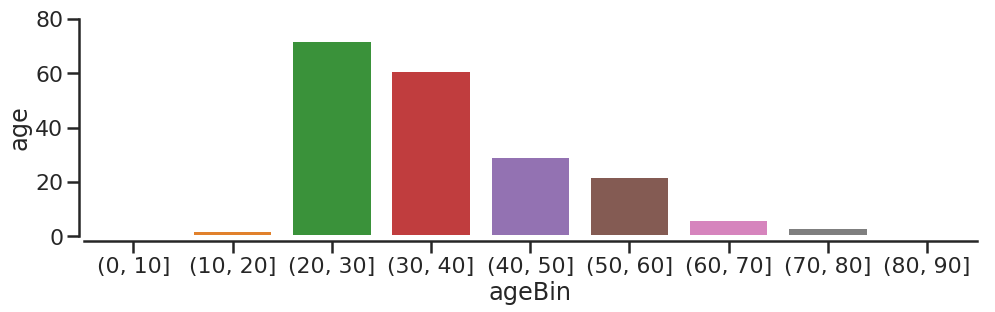

In [14]:
plt.figure(figsize=(16,4))
sns.barplot(data=count_df,x='ageBin',y='age')
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

### explore

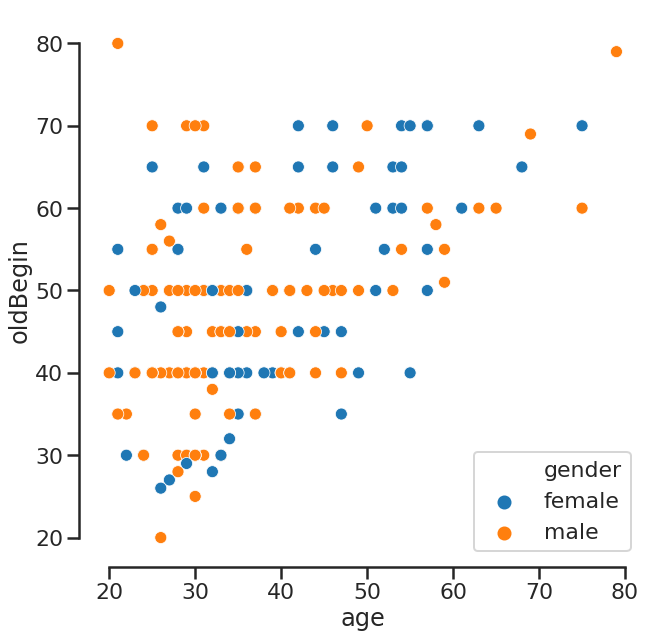

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=clean_df,x='age',y='oldBegin',hue='gender')
sns.despine(trim=True,offset=5)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


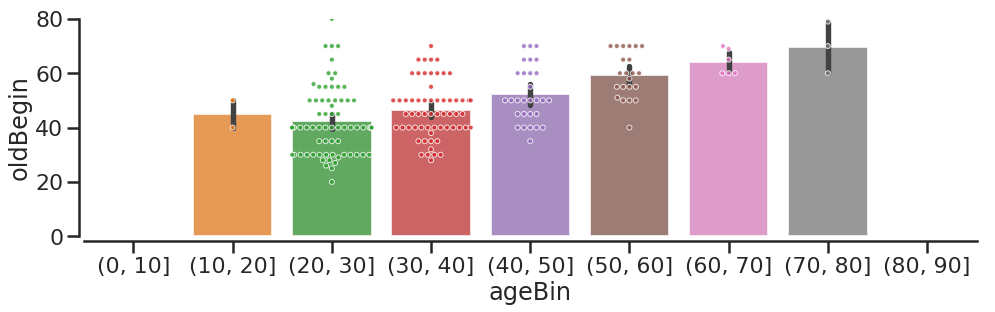

In [16]:
plt.figure(figsize=(16,4))
sns.barplot(data=clean_df,x='ageBin',y='oldBegin',alpha=0.8)
sns.swarmplot(data=clean_df,x='ageBin',y='oldBegin',linewidth=1,edgecolor='white',alpha=0.8)
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


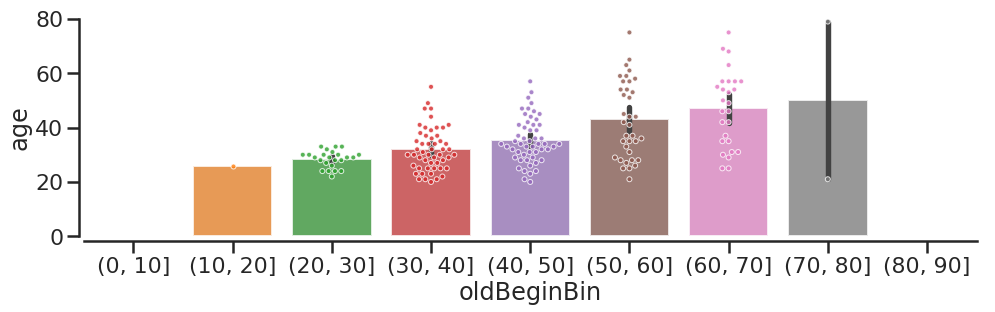

In [17]:
plt.figure(figsize=(16,4))
sns.barplot(data=clean_df,x='oldBeginBin',y='age',alpha=0.8)
sns.swarmplot(data=clean_df,x='oldBeginBin',y='age',linewidth=1,edgecolor='white',alpha=0.8)
sns.despine(offset=5)
plt.ylim(0,80)
plt.show()

In [18]:
clean_df

,ageFeel,oldBegin,oldReally,age,gender,numChild,ageBin,oldBeginBin
0,4,55,80,21,female,0,"(20, 30]","(50, 60]"
1,5,40,50,39,female,5,"(30, 40]","(30, 40]"
2,5,40,70,21,female,0,"(20, 30]","(30, 40]"
3,2,40,60,36,female,1,"(30, 40]","(30, 40]"
4,5,50,112,46,male,0,"(40, 50]","(40, 50]"
5,5,40,60,47,male,2,"(40, 50]","(30, 40]"
6,5,30,90,29,female,0,"(20, 30]","(20, 30]"
7,1,40,50,35,female,0,"(30, 40]","(30, 40]"
8,5,30,50,33,male,0,"(30, 40]","(20, 30]"
9,3,50,75,41,male,2,"(40, 50]","(40, 50]"


In [19]:
num_df = pd.DataFrame( clean_df.groupby(['ageBin','oldBeginBin']).count().loc[:,'age'] )

In [20]:
num_df

age
ageBin   oldBeginBin      
(0, 10]  (0, 10]       NaN
         (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      NaN
         (40, 50]      NaN
         (50, 60]      NaN
         (60, 70]      NaN
         (70, 80]      NaN
         (80, 90]      NaN
(10, 20] (0, 10]       NaN
         (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      1.0
         (40, 50]      1.0
         (50, 60]      NaN
         (60, 70]      NaN
         (70, 80]      NaN
         (80, 90]      NaN
(20, 30] (0, 10]       NaN
         (10, 20]      1.0
         (20, 30]     19.0
         (30, 40]     25.0
         (40, 50]     13.0
         (50, 60]      9.0
         (60, 70]      4.0
         (70, 80]      1.0
         (80, 90]      NaN
(30, 40] (0, 10]       NaN
         (10, 20]      NaN
         (20, 30]      5.0
...                    ...
(50, 60] (60, 70]      8.0
         (70, 80]      NaN
         (80, 90]      NaN
(60, 70] (0, 10]       NaN
         (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      NaN
         (40, 50]      NaN
         (50, 60]      3.0
         (60, 70]      3.0
         (70, 80]      NaN
         (80, 90]      NaN
(70, 80] (0, 10]       NaN
         (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      NaN
         (40, 50]      NaN
         (50, 60]      1.0
         (60, 70]      1.0
         (70, 80]      1.0
         (80, 90]      NaN
(80, 90] (0, 10]       NaN
         (10, 20]      NaN
         (20, 30]      NaN
         (30, 40]      NaN
         (40, 50]      NaN
         (50, 60]      NaN
         (60, 70]      NaN
         (70, 80]      NaN
         (80, 90]      NaN

[81 rows x 1 columns]

In [21]:
num_df = num_df.unstack().T.loc['age',:]

In [22]:
num_df

ageBin,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]"
oldBeginBin,,,,,,,,,
"(0, 10]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(10, 20]",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"(20, 30]",NaN,NaN,19.0,5.0,NaN,NaN,NaN,NaN,NaN
"(30, 40]",NaN,1.0,25.0,19.0,6.0,1.0,NaN,NaN,NaN
"(40, 50]",NaN,1.0,13.0,24.0,12.0,3.0,NaN,NaN,NaN
"(50, 60]",NaN,NaN,9.0,8.0,5.0,10.0,3.0,1.0,NaN
"(60, 70]",NaN,NaN,4.0,5.0,6.0,8.0,3.0,1.0,NaN
"(70, 80]",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


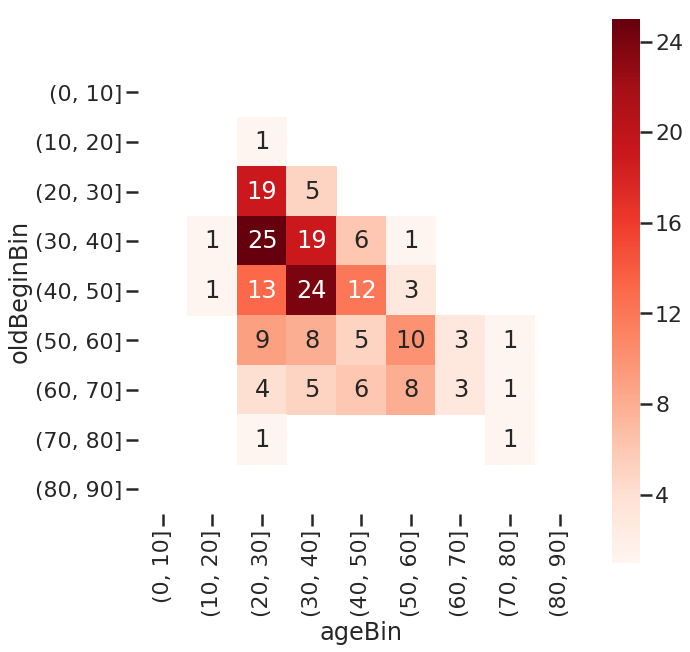

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df,square=True,annot=True,cmap='Reds')
plt.show()

In [24]:
num_df.sum(axis=0)

ageBin
(0, 10]      0.0
(10, 20]     2.0
(20, 30]    72.0
(30, 40]    61.0
(40, 50]    29.0
(50, 60]    22.0
(60, 70]     6.0
(70, 80]     3.0
(80, 90]     0.0
dtype: float64

In [25]:
percent_df = (num_df/num_df.sum(axis=0)) * 100

In [26]:
percent_df

ageBin,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]"
oldBeginBin,,,,,,,,,
"(0, 10]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(10, 20]",NaN,NaN,1.388889,NaN,NaN,NaN,NaN,NaN,NaN
"(20, 30]",NaN,NaN,26.388889,8.196721,NaN,NaN,NaN,NaN,NaN
"(30, 40]",NaN,50.0,34.722222,31.147541,20.689655,4.545455,NaN,NaN,NaN
"(40, 50]",NaN,50.0,18.055556,39.344262,41.379310,13.636364,NaN,NaN,NaN
"(50, 60]",NaN,NaN,12.500000,13.114754,17.241379,45.454545,50.0,33.333333,NaN
"(60, 70]",NaN,NaN,5.555556,8.196721,20.689655,36.363636,50.0,33.333333,NaN
"(70, 80]",NaN,NaN,1.388889,NaN,NaN,NaN,NaN,33.333333,NaN
"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


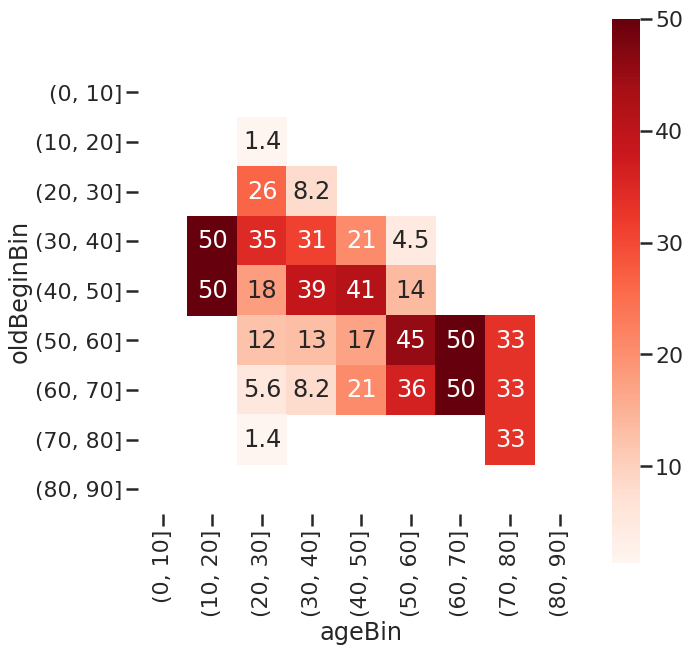

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(percent_df,square=True,annot=True,cmap='Reds')
plt.show()

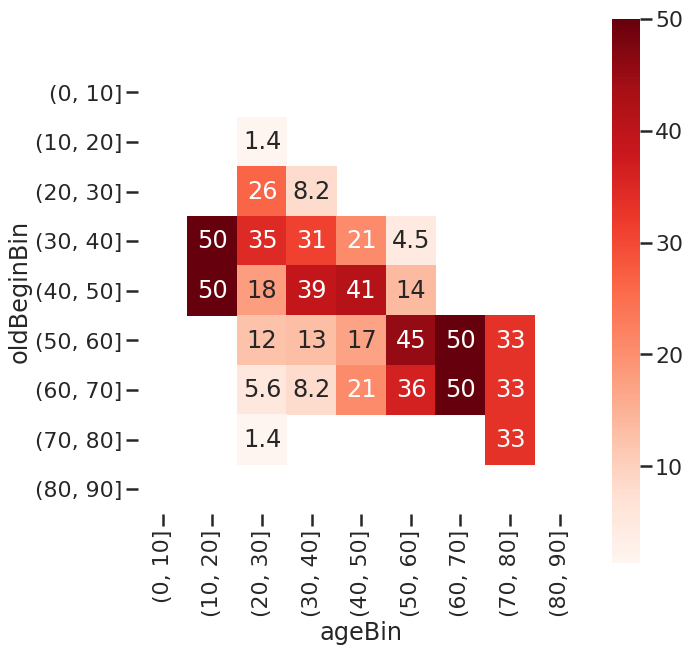

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(percent_df,square=True,annot=True,cmap='Reds')
plt.show()